 In this notebook, I explore images to find lane lines 

In [1]:
#import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

from IPython.html import widgets
import ipywidgets
piano = ipywidgets.VBox()
%matplotlib inline

/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Abs Sobel Thresh

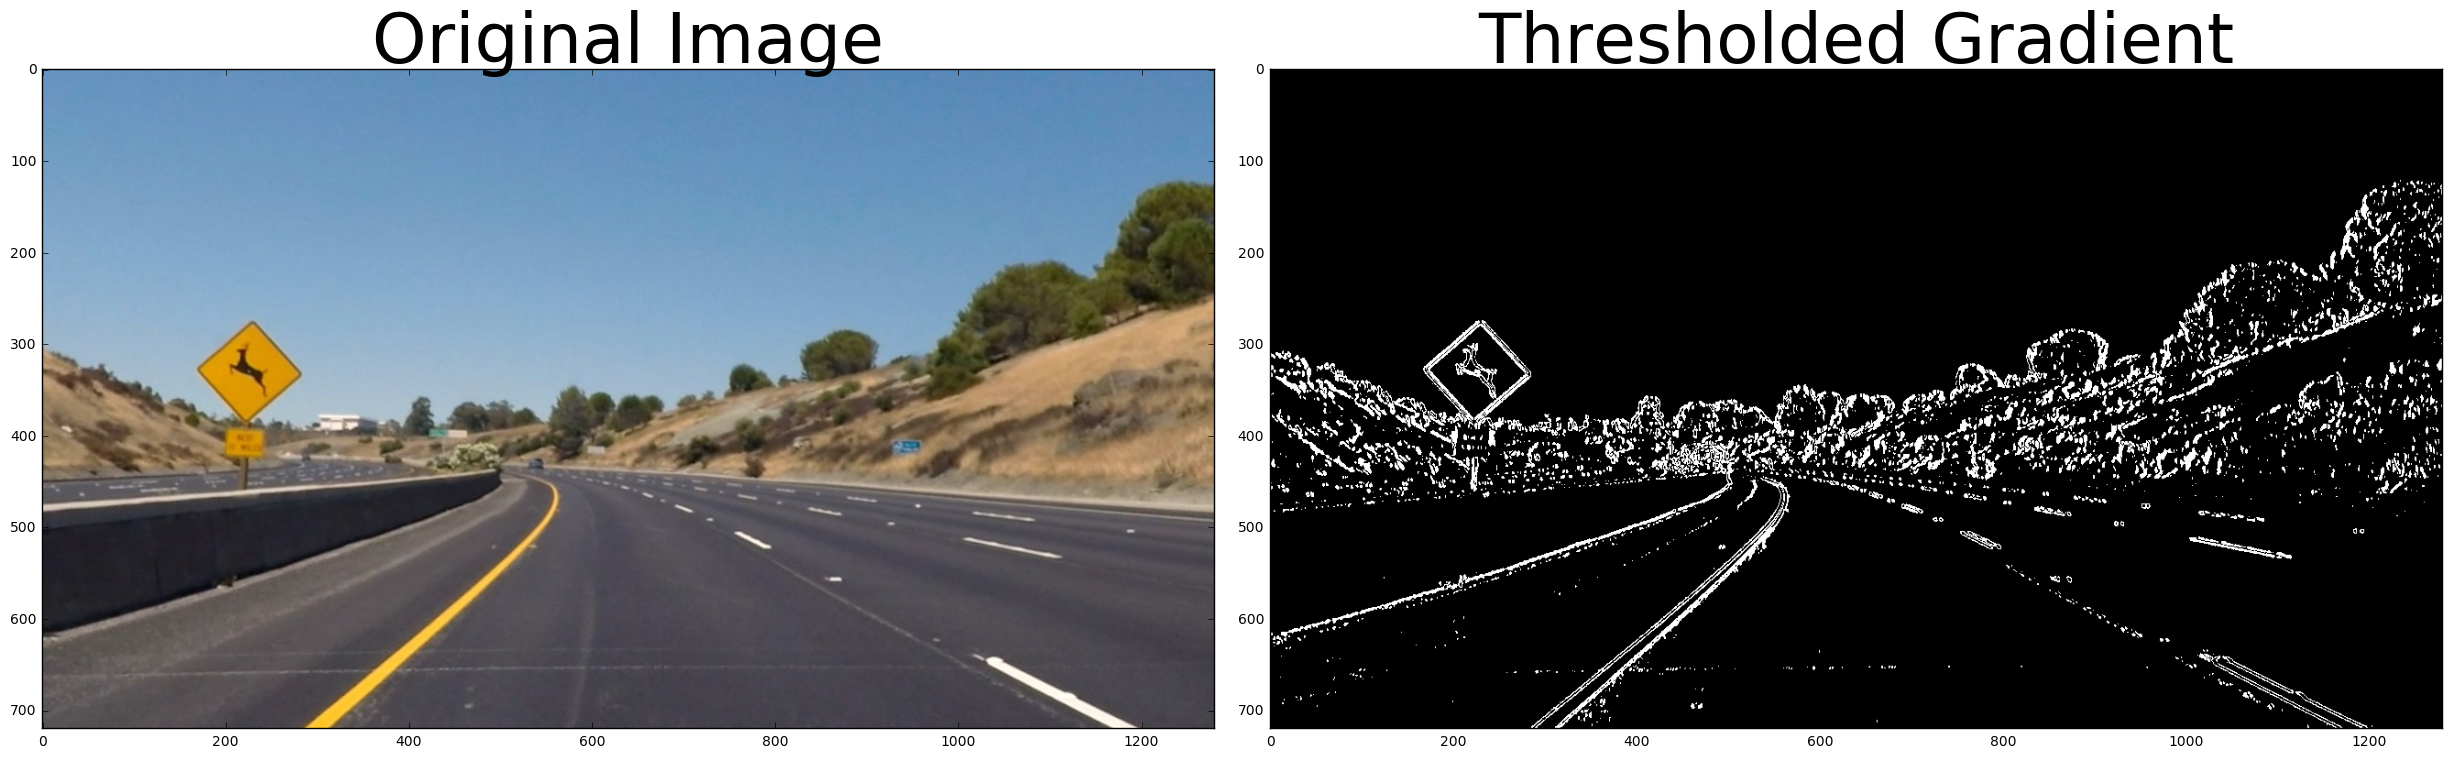

In [2]:
# Read in an image and grayscale it
image = mpimg.imread('output_images/test2_undist.jpg')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3 ,thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == "x":
        sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    elif orient =="y":
        sobel = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    else:
        pass
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel>=thresh_min)&(scaled_sobel<=thresh_max)]=1
    # 6) Return this mask as your binary_output image
    
    binary_output = sbinary # Remove this line
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

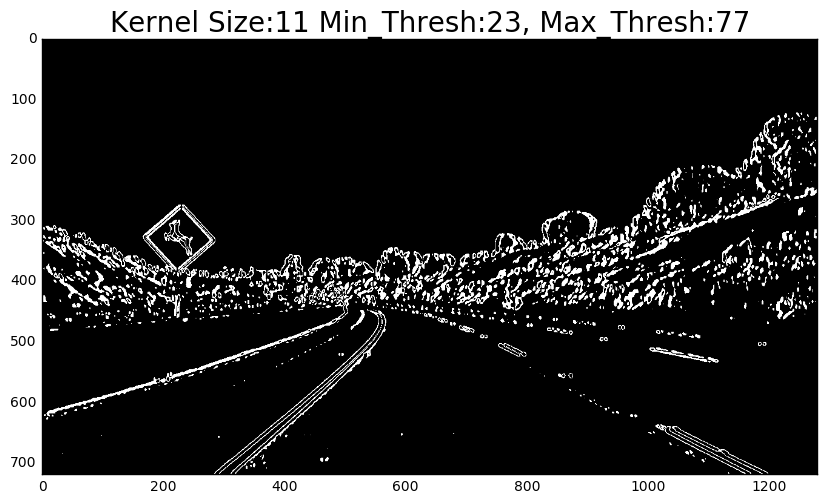

In [3]:
@widgets.interact(orient=widgets.RadioButtons(options=['x', 'y'],value='x',description='Orient:',disabled=False),
                                ksize = widgets.IntSlider(min=3,max=25,step=2,value=11),
                                min_thresh=widgets.IntSlider(min=0,max=255,step=1,value=23),
                                max_thresh=widgets.IntSlider(min=0,max=255,step=1,value=77))
def thresh(orient,ksize,min_thresh,max_thresh):
    grad_binary = abs_sobel_thresh(image, sobel_kernel=ksize,orient=orient, thresh_min=min_thresh, thresh_max=max_thresh)
    
    plt.figure(figsize=(10,8))
    plt.imshow(grad_binary,cmap="gray")
    plt.title("Kernel Size:%s Min_Thresh:%s, Max_Thresh:%s"%(str(ksize),str(min_thresh),str(max_thresh)),fontsize=20)

# Mag Thresh

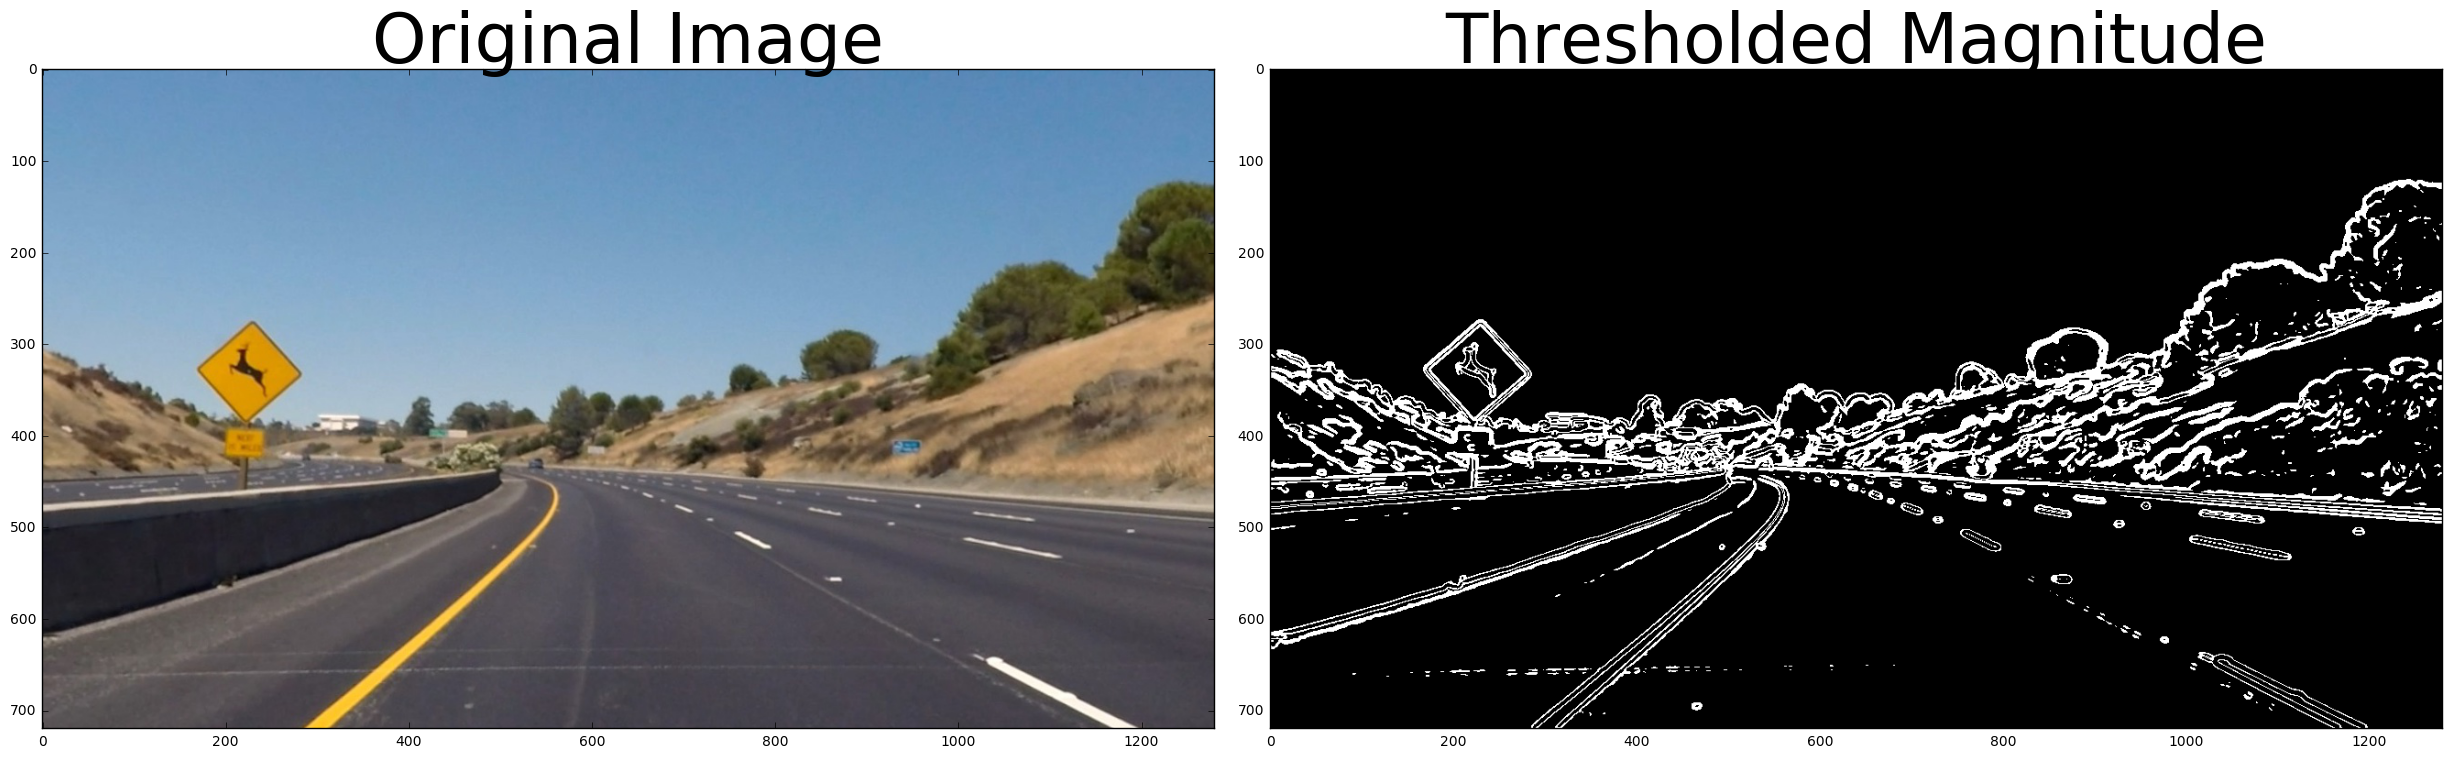

In [4]:
# Read in an image
image = mpimg.imread('output_images/test2_undist.jpg')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    sobelxy = np.sqrt(sobelx**2+sobely**2)
    # 5) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    abssxy = np.absolute(sobelxy)
    scale_factor = np.max(abssxy)/255
    abssxy = (abssxy/scale_factor).astype(np.int8)
    binary_output = np.zeros_like(abssxy)
    binary_output[(abssxy > mag_thresh[0]) & (abssxy < mag_thresh[1])] = 1
    # 6) Create a binary mask where mag thresholds are met
    # 7) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=11, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

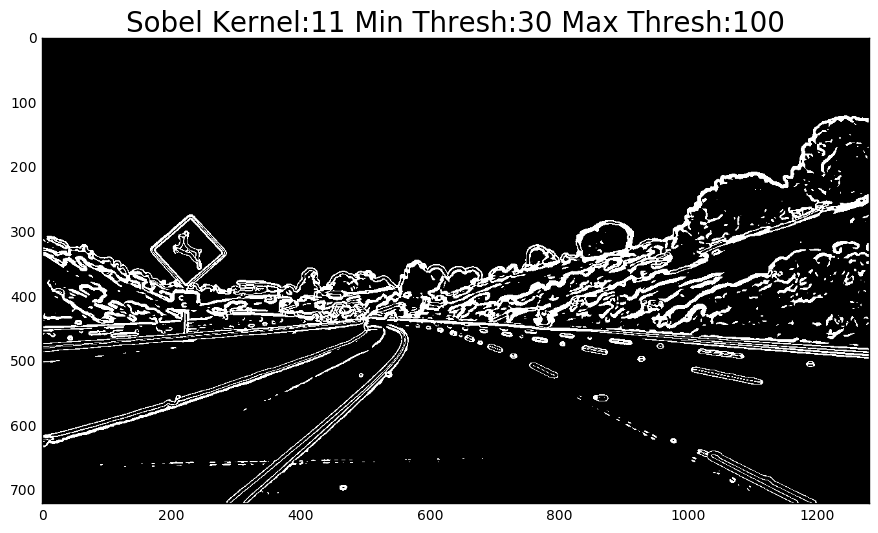

In [5]:
image = mpimg.imread('output_images/test2_undist.jpg')
@widgets.interact(sobel_kernel=widgets.IntSlider(min=3,max=25,step=2,value=11),
                                 min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=30),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=100))
def mag(sobel_kernel,min_thresh,max_thresh):
    mag_binary = mag_thresh(image, sobel_kernel=sobel_kernel, mag_thresh=(min_thresh, max_thresh))
    plt.figure(figsize=(12,6))
    plt.imshow(mag_binary,cmap="gray")
    plt.title("Sobel Kernel:%s Min Thresh:%s Max Thresh:%s"%(str(sobel_kernel),str(min_thresh),str(max_thresh)),fontsize=20)
    
    

# Dir Threshold

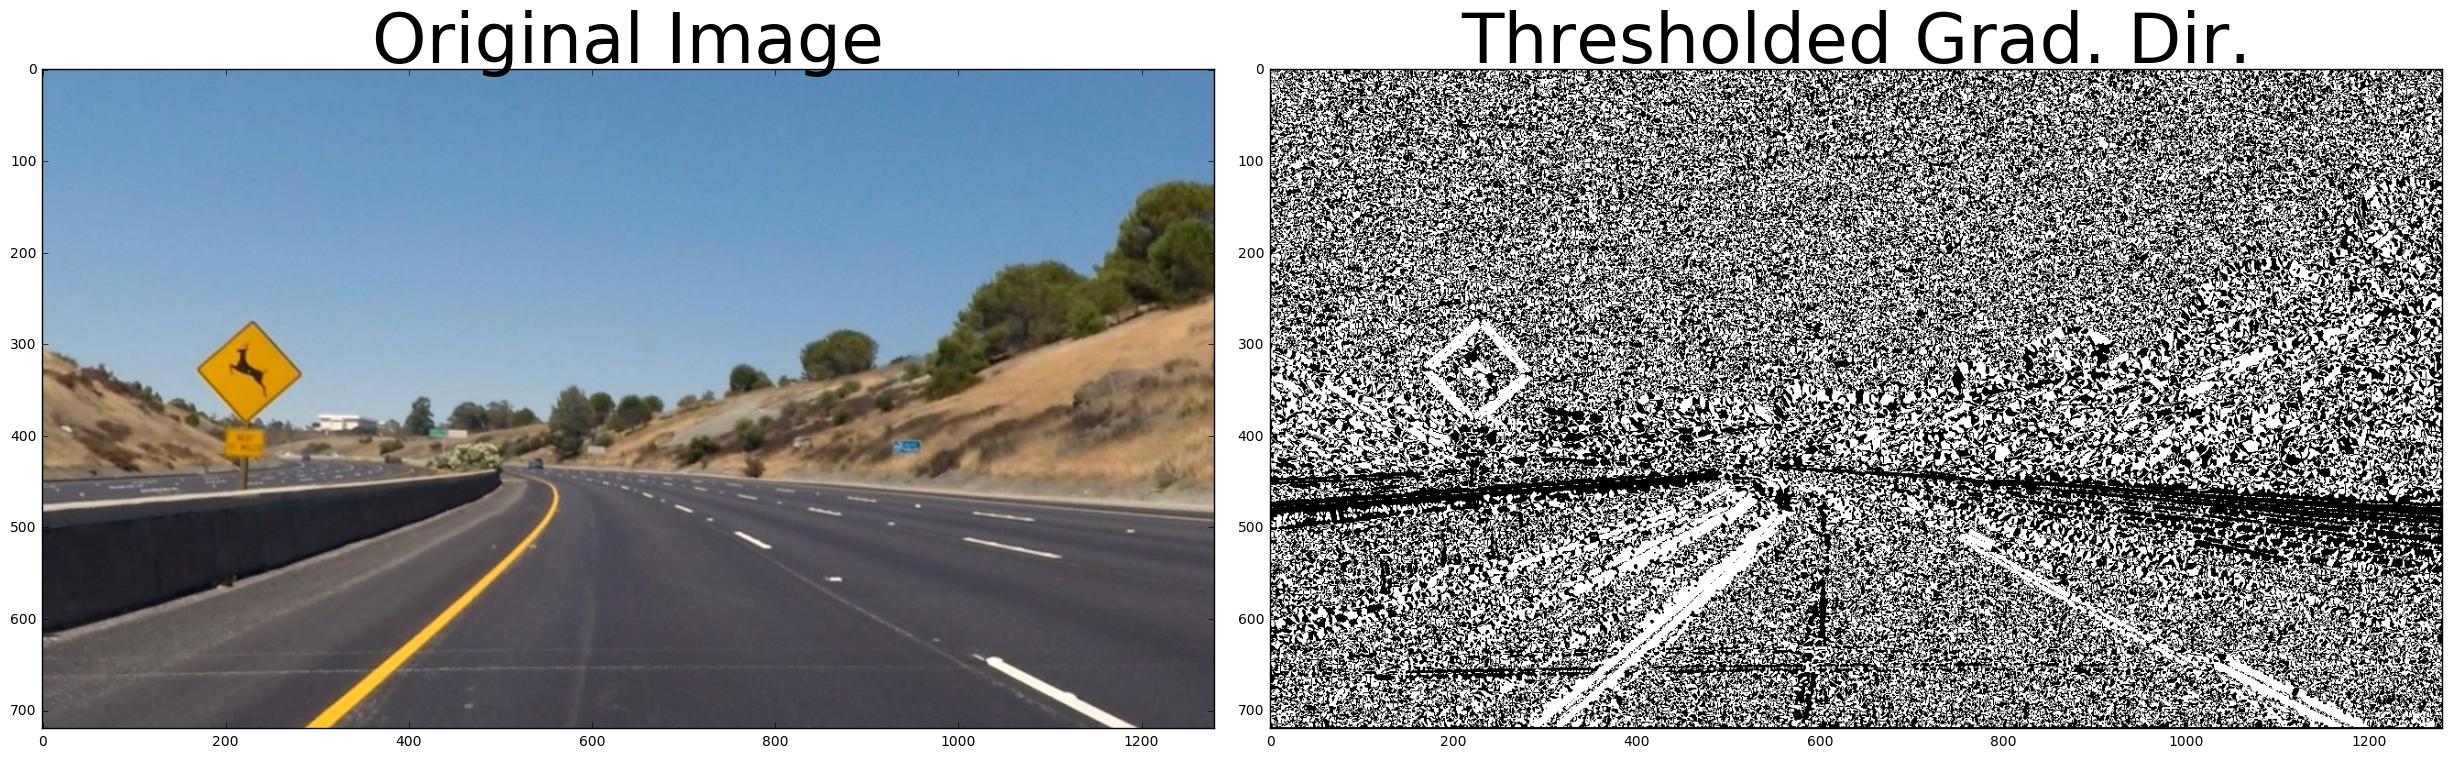

In [6]:
# Read in an image

image = mpimg.imread('output_images/test2_undist.jpg')
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    arctan = np.arctan2(abs_sobely,abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    sarctan = np.zeros_like(arctan)
    sarctan[(arctan>=thresh[0])&(arctan<=thresh[1])]=1
    # 6) Return this mask as your binary_output image
    binary_output = sarctan # Remove this line
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=9, thresh=(0.5, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

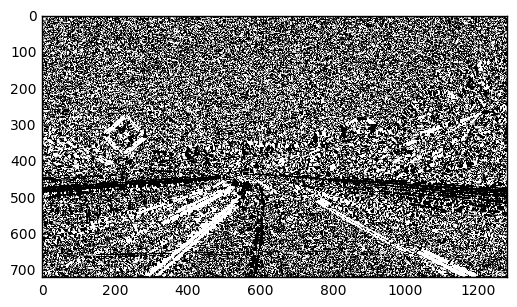

In [7]:
@widgets.interact(sobel_kernel=widgets.IntSlider(min=3,max=25,step=2,value=15),
                                 min_thresh = widgets.FloatSlider(min=0,max=np.pi/2,step=0.05,value=0.7),
                                 max_thresh = widgets.FloatSlider(min=0,max=np.pi/2,step=0.05,value=1.3))
def mag(sobel_kernel,min_thresh,max_thresh):
    dir_binary = dir_threshold(image, sobel_kernel=sobel_kernel, thresh=(min_thresh, max_thresh))
    histogram = np.sum(dir_binary, axis=0)
    plt.imshow(dir_binary,cmap="gray")

# Color Space(HLS)

/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Color Space: S
(720, 1280)


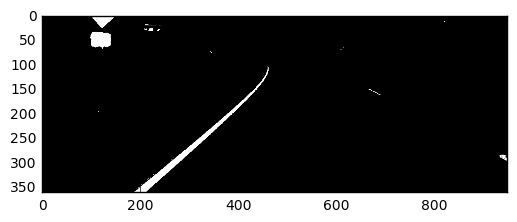

In [8]:
# Read in an image
image = mpimg.imread('output_images/test2_undist.jpg')
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def color_threshold_HLS(img, color_space,thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    HLS = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    H= HLS[:,:,0]
    L= HLS[:,:,1]
    S = HLS[:,:,2]
    
    if color_space == "H":
        binary = np.zeros_like(H)
        binary[(H>=thresh[0])&(H<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(H.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="L":
        binary = np.zeros_like(L)
        binary[(L>=thresh[0])&(L<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(L.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="S":
        binary = np.zeros_like(S)
        binary[(S>=thresh[0])&(S<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(S.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    return color_space_binary
    # 6) Return this mask as your binary_output image
@widgets.interact(color_space=widgets.RadioButtons(options=['H', 'L', 'S'],value='S',description='Color Space:',disabled=False),
                                   min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=167),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=233))
def color_thresh(color_space,min_thresh,max_thresh):
    binary_image = color_threshold_HLS(image,color_space,thresh=(min_thresh,max_thresh))
    print(binary_image.shape)
    plt.imshow(binary_image[binary_image.shape[0]/2:,100:1050],cmap="gray")

# Color Space(RGB)

/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Color Space: R
(720, 1280)


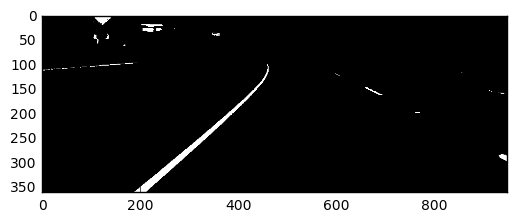

In [9]:
# Read in an image
image = mpimg.imread('output_images/test2_undist.jpg')
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def color_threshold_RGB(img, color_space,thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    
    R= img[:,:,0]
    G= img[:,:,1]
    B = img[:,:,2]
    
    if color_space == "R":
        binary = np.zeros_like(R)
        binary[(R>=thresh[0])&(R<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(R.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="G":
        binary = np.zeros_like(G)
        binary[(G>=thresh[0])&(G<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(G.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="B":
        binary = np.zeros_like(B)
        binary[(B>=thresh[0])&(B<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(B.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    return color_space_binary
    # 6) Return this mask as your binary_output image
@widgets.interact(color_space=widgets.RadioButtons(options=['R', 'G', 'B'],value='R',description='Color Space:',disabled=False),
                                   min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=215),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=255))
def color_thresh(color_space,min_thresh,max_thresh):
    binary_image = color_threshold_RGB(image,color_space,thresh=(min_thresh,max_thresh))
    print(binary_image.shape)
    histogram = np.sum(binary_image[binary_image.shape[0]/2:,100:1050], axis=0)
    plt.imshow(binary_image[binary_image.shape[0]/2:,100:1050],cmap="gray")
    #f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 9))
    #f.tight_layout()
    #ax1.imshow(image)
    #ax2.plot(histogram)
    #ax1.imshow(binary_image[binary_image.shape[0]/2:,100:1050],cmap="gray")
    

/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Color Space: S
(720, 1280)


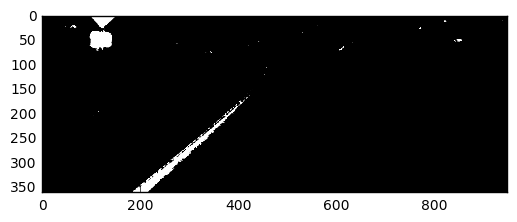

In [10]:
# Read in an image
image = mpimg.imread('output_images/test2_undist.jpg')
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def color_threshold_HSV(img, color_space,thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    HSV = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    H= HSV[:,:,0]
    S= HSV[:,:,1]
    V = HSV[:,:,2]
    
    if color_space == "H":
        binary = np.zeros_like(H)
        binary[(H>=thresh[0])&(H<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(H.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="S":
        binary = np.zeros_like(S)
        binary[(S>=thresh[0])&(S<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(S.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="V":
        binary = np.zeros_like(V)
        binary[(V>=thresh[0])&(V<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(V.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    return color_space_binary
    # 6) Return this mask as your binary_output image
@widgets.interact(color_space=widgets.RadioButtons(options=['H', 'S', 'V'],value='S',description='Color Space:',disabled=False),
                                   min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=167),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=233))
def color_thresh(color_space,min_thresh,max_thresh):
    binary_image = color_threshold_HSV(image,color_space,thresh=(min_thresh,max_thresh))
    print(binary_image.shape)
    plt.imshow(binary_image[binary_image.shape[0]/2:,100:1050],cmap="gray")
    #f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    #f.tight_layout()
    #ax1.imshow(image)
    #ax2.imshow(binary_image,cmap="gray")

# Perspective Transform

In [11]:
def warp(img):
    img_size=(img.shape[1],img.shape[0])
    src = np.float32([[(0,img_size[1]),(img_size[0],img_size[1]),(0.6*img_size[0],2./3*img_size[1]),(0.4*img_size[0],2./3*img_size[1])]])
    dst = np.float32([[0,img_size[1]],[img_size[0],img_size[1]],[img_size[0],0],[0,0]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped,M,Minv

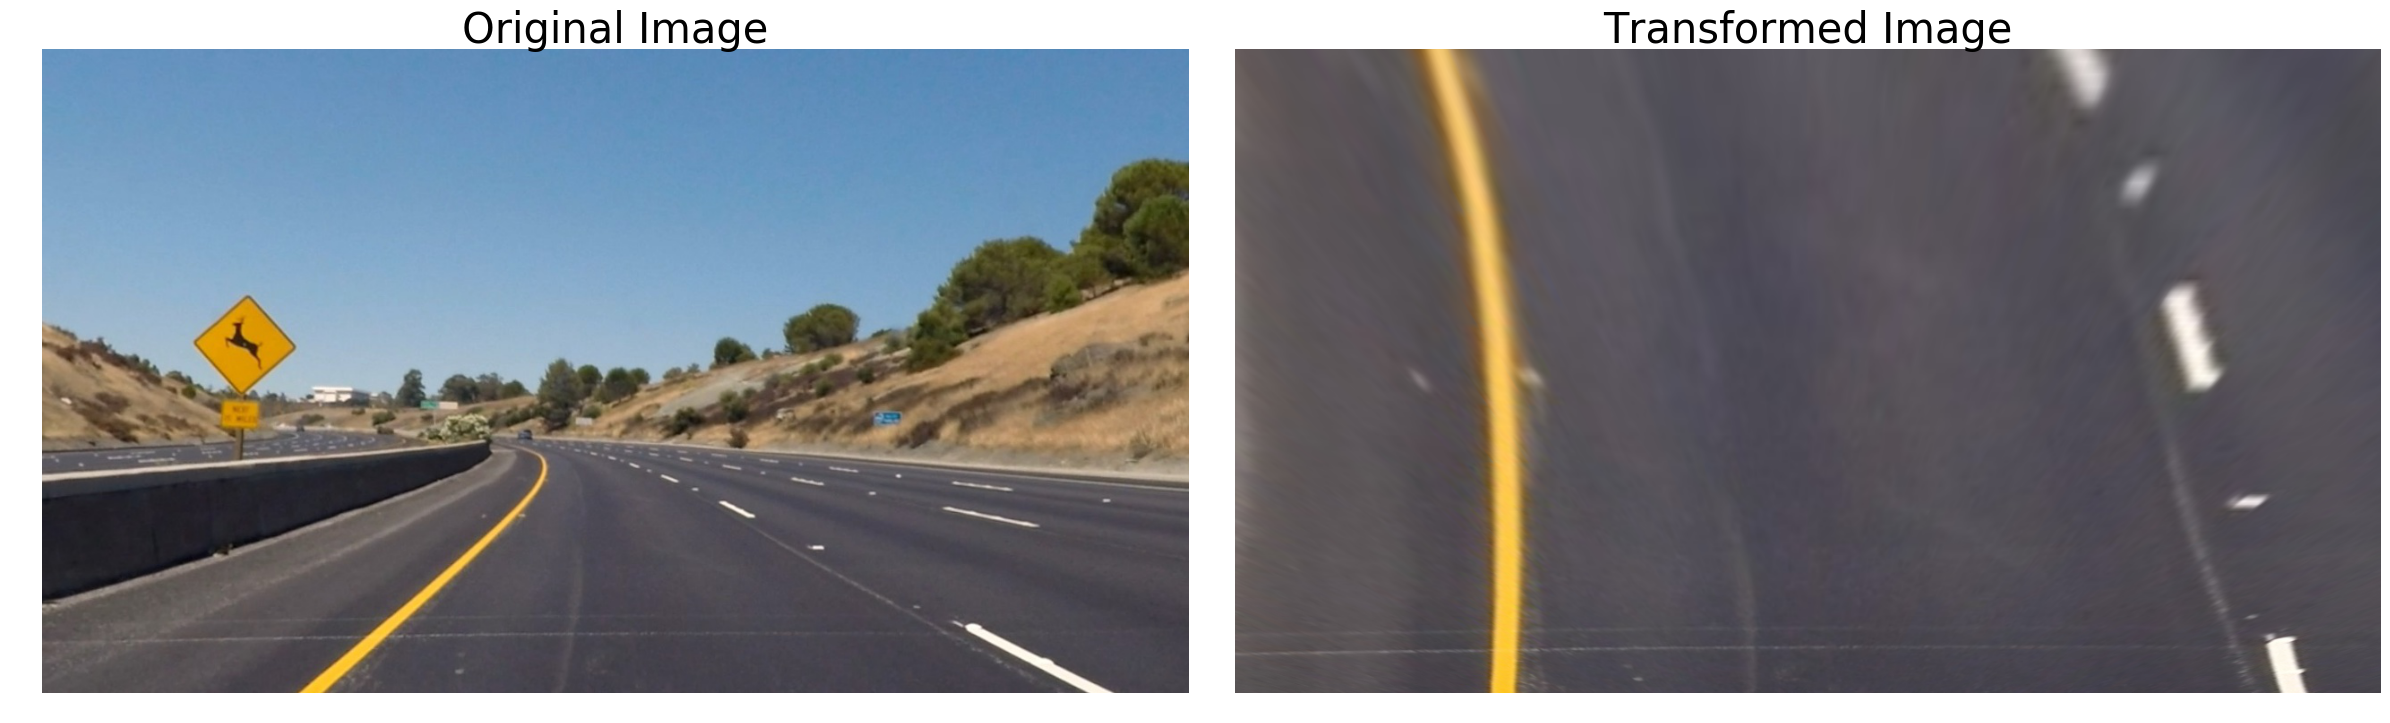

In [12]:
image= mpimg.imread('output_images/test2_undist.jpg')
warped,_,_ = warp(image)
f,(ax1,ax2) = plt.subplots(1,2,figsize=(24, 9))
ax1.imshow(image)
ax1.set_title("Original Image",fontsize=30)
ax1.axis("off")
ax2.imshow(warped)
ax2.set_title("Transformed Image",fontsize=30)
ax2.axis("off")
f.tight_layout()

# Color mask function

In [13]:
#binary image
def color_mask(color_space,low,high):
    mask = cv2.inRange(color_space, low, high)
    return mask
# apply color to the binary image
def apply_color_mask(color_space,img,low,high):
    mask = cv2.inRange(color_space, low, high)
    result = cv2.bitwise_and(img,img, mask= mask)
    return result

# White Line Detection

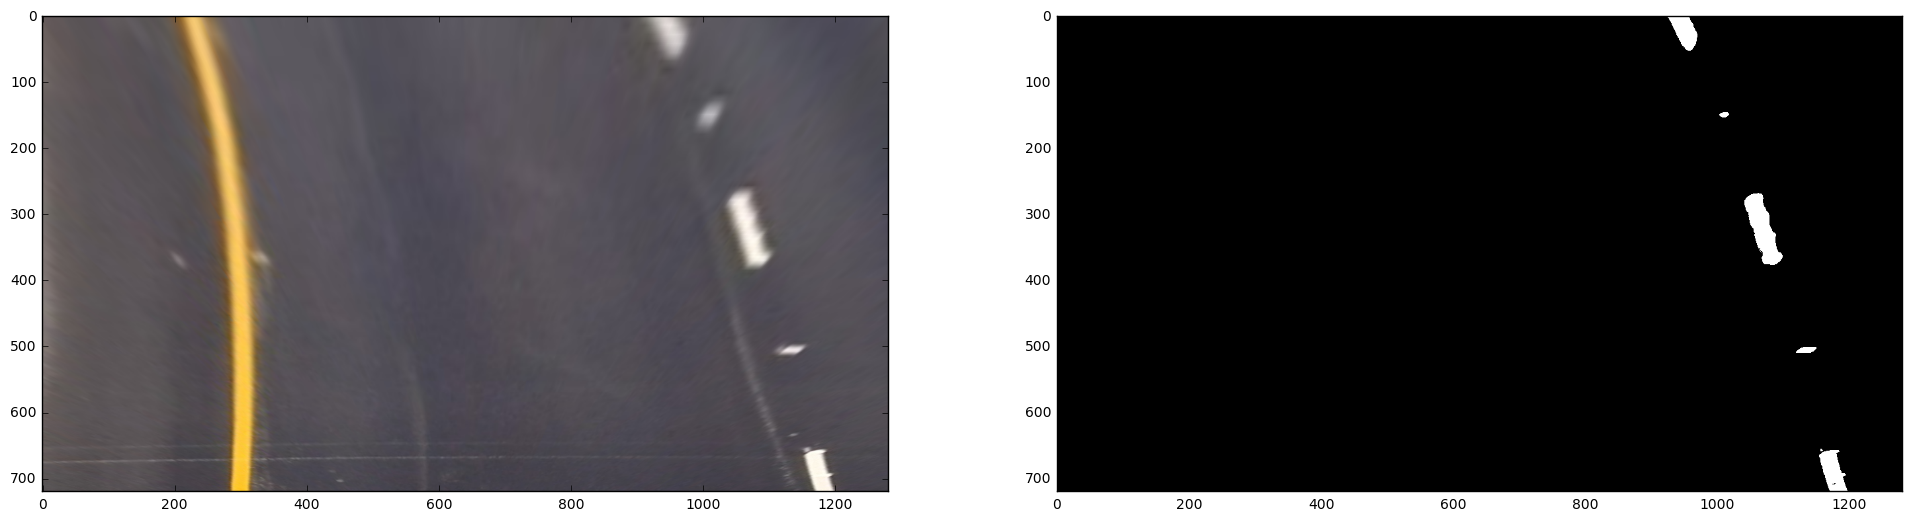

In [14]:
image= mpimg.imread('output_images/test2_undist.jpg')
warped,_,_ = warp(image)
img_size=(warped.shape[1],warped.shape[0])
#warped,M,Minv = warp(image)
image_HSV = cv2.cvtColor(warped,cv2.COLOR_RGB2HSV)

@widgets.interact(w_h_l = widgets.IntSlider(min=0,max=255,step=1,value=0),
                                w_h_h = widgets.IntSlider(min=0,max=255,step=1,value=255),
                                  w_s_l = widgets.IntSlider(min=0,max=255,step=1,value=0),
                                  w_s_h = widgets.IntSlider(min=0,max=255,step=1,value=24),
                                  w_v_l = widgets.IntSlider(min=0,max=255,step=1,value=180),
                                  w_v_h = widgets.IntSlider(min=0,max=255,step=1,value=255))
def pipe_trial( w_h_l,w_h_h,w_s_l,w_s_h,w_v_l,w_v_h):



   

    white_hsv_low  = np.array([  w_h_l,   w_s_l,   w_v_l])
    white_hsv_high = np.array([ w_h_h,  w_s_h, w_v_h])

    white_lane = color_mask(image_HSV,white_hsv_low,white_hsv_high)

    f,(ax1,ax2) =plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(warped)
    ax2.imshow(white_lane,cmap="gray")


# Yellow Line Detection

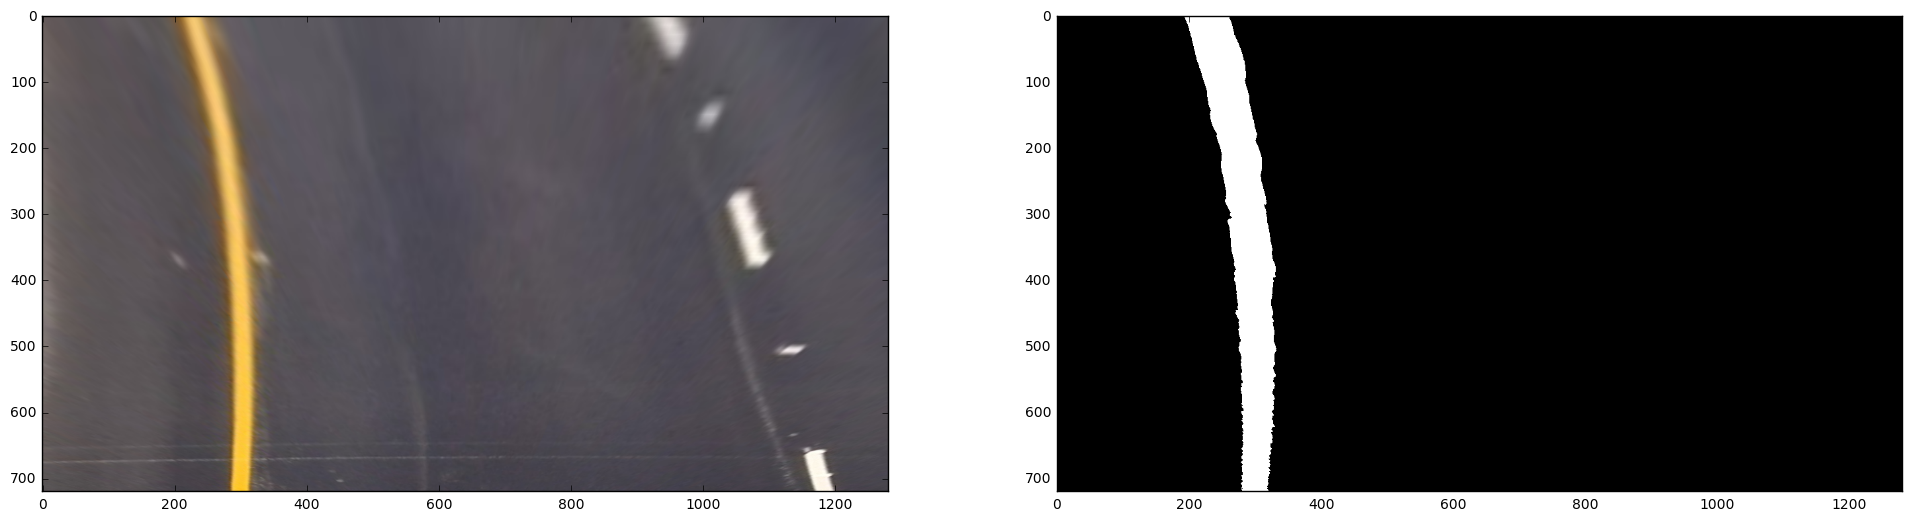

In [15]:
image= mpimg.imread('output_images/test2_undist.jpg')
warped,_,_ = warp(image)
img_size=(warped.shape[1],warped.shape[0])
#warped,M,Minv = warp(image)
image_HSV = cv2.cvtColor(warped,cv2.COLOR_RGB2HSV)

@widgets.interact(y_h_l = widgets.IntSlider(min=0,max=255,step=1,value=0),
                                y_h_h = widgets.IntSlider(min=0,max=255,step=1,value=80),
                                  y_s_l = widgets.IntSlider(min=0,max=255,step=1,value=80),
                                  y_s_h = widgets.IntSlider(min=0,max=255,step=1,value=255),
                                #  y_v_l = widgets.IntSlider(min=0,max=255,step=1,value=0),
                                  y_v_l = widgets.IntSlider(min=0,max=255,step=1,value=80),
                                  y_v_h = widgets.IntSlider(min=0,max=255,step=1,value=255))
def pipe_trial(y_h_l,y_h_h,y_s_l,y_s_h,y_v_l,y_v_h):



    yellow_hsv_low  = np.array([ y_h_l, y_s_l, y_v_l])
    yellow_hsv_high = np.array([ y_h_h, y_s_h, y_v_h])

    

    yellow_lane = color_mask(image_HSV,yellow_hsv_low,yellow_hsv_high)
    

    f,(ax1,ax2) =plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(warped)
    ax2.imshow(yellow_lane,cmap="gray")


# Putting it together

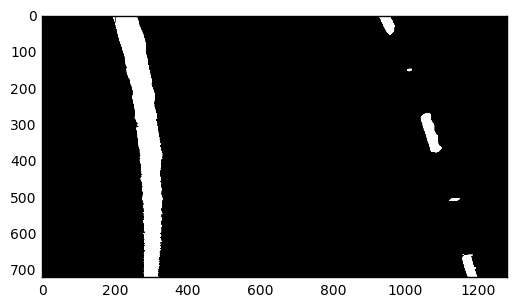

In [16]:
yellow_hsv_low  = np.array([ 0, 80, 0])
yellow_hsv_high = np.array([ 80, 255, 255])

white_hsv_low  = np.array([  0,   0,   180])
white_hsv_high = np.array([ 255,  28, 255])
yellow_lane = color_mask(image_HSV,yellow_hsv_low,yellow_hsv_high)
white_lane = color_mask(image_HSV,white_hsv_low,white_hsv_high)
lane_color = cv2.bitwise_or(yellow_lane,white_lane)
plt.imshow(lane_color,cmap="gray")

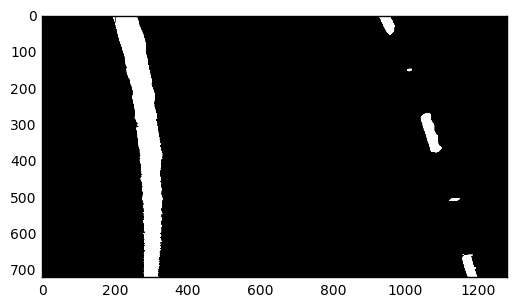

In [17]:
sobel_x = abs_sobel_thresh(warped)
lane_line = cv2.bitwise_or(sobel_x,lane_color)
plt.imshow(lane_line,cmap="gray")

## Add GaussianBlur

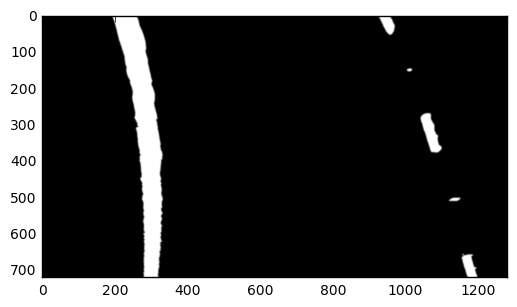

In [18]:
lane_line_gb = cv2.GaussianBlur(lane_line,(9,9),0)/255.
plt.imshow(lane_line_gb,cmap="gray")

In [19]:
def moving_average(a, n=3):
    # Moving average
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


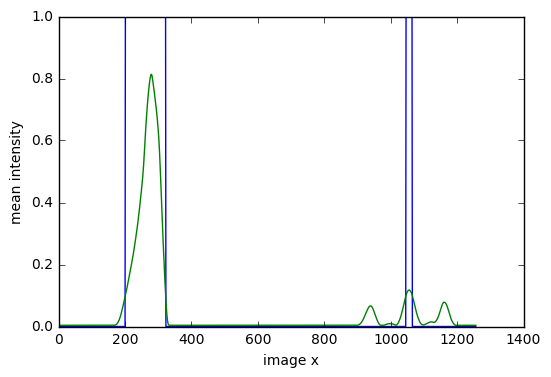

In [20]:
img_size=(lane_line_gb.shape[1],lane_line_gb.shape[0])
mov_filtsize = img_size[1]/30.
mean_lane = np.mean(lane_line_gb,axis=0)
mean_lane= moving_average(mean_lane,mov_filtsize)
plt.plot(mean_lane>0.1)
plt.plot(mean_lane)
plt.xlabel('image x')
plt.ylabel('mean intensity')

In [44]:
#function for lane detection
def lane_detection(lane_ling_gb,thresh=0.005,which="left"):
    img_size =(lane_line_gb.shape[1],lane_line_gb.shape[0])
    arg_fsb = np.argwhere(mean_lane>thresh)
  
    if which  == "left":
        arg_fsb_L = arg_fsb[arg_fsb<img_size[0]/2.]
        arg_fsb_L = arg_fsb[arg_fsb<img_size[0]/2.]
        arg_fsb_L_min = np.min(arg_fsb_L)
        arg_fsb_L_max = np.max(arg_fsb_L)
        img_L = np.copy(lane_line_gb)
        img_L[:,0:arg_fsb_L_min] = 0
        img_L[:,arg_fsb_L_max:img_size[0]] = 0
        return img_L

    elif which =="right":
        arg_fsb_R = arg_fsb[arg_fsb>img_size[0]/2.]
        arg_fsb_R_min = np.min(arg_fsb_R)
        arg_fsb_R_max = np.max(arg_fsb_R)
        img_R = np.copy(lane_line_gb)
        img_R[:,0:arg_fsb_R_min] = 0
        img_R[:,arg_fsb_R_max:img_size[0]] = 0
        return img_R
    else:
        pass
    

In [45]:
left_lane = lane_detection(lane_line_gb, thresh = 0.05, which = "left")
right_lane = lane_detection(lane_line_gb, thresh = 0.05,which = "right")

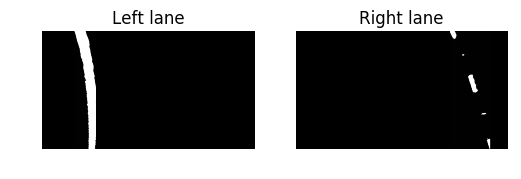

In [46]:
plt.subplot(1,2,1)
plt.imshow(left_lane,cmap='gray')
plt.axis('off')
plt.title('Left lane')
plt.subplot(1,2,2)
plt.imshow(right_lane,cmap='gray')
plt.axis('off')
plt.title('Right lane');

In [43]:
# function for polynomial fit
def polyfit(line,thresh=0.5):
    
    img_size = (line.shape[1],line.shape[0])
    vals = np.argwhere(line > thresh)
    
    all_x = vals.T[0]
    all_y = vals.T[1]
    
    fit = np.polyfit(all_x, all_y, 2)
    y = np.arange(11)*img_size[1]/10
    fitx = fit[0] * y**2 + fit[1]*y + fit[2]
    return fitx,y,fit


In [34]:
left_fitx , left_y, left_fit = polyfit(left_lane)
right_fitx, right_y, right_fit = polyfit(right_lane)

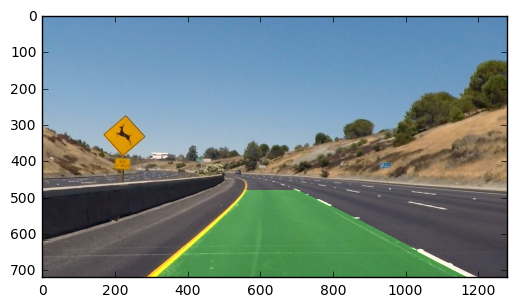

In [35]:


wpb_zero = np.zeros_like(lane_line_gb).astype(np.uint8)
color_warp = np.dstack((wpb_zero, wpb_zero, wpb_zero))
    
# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, left_y]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, right_y])))])

pts = np.hstack((pts_left, pts_right))



    # Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

warped,M,Minv = warp(image)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image

result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
plt.imshow(result)


In [36]:
image.shape

(720, 1280, 3)

In [37]:
left_lane.shape
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

NameError: name 'ploty' is not defined

In [38]:
def get_curvature(pol_a,y_pt):
    A = pol_a[0]
    B = pol_a[1]
    R_curve = (1+(2*A*y_pt+B)**2)**1.5/np.absolute(2*A)
    return R_curve

def polyfit(line,thresh=0.5):
    
    img_size = (line.shape[1],line.shape[0])
    vals = np.argwhere(line > thresh)
    
    all_x = vals.T[0]
    all_y = vals.T[1]
    
    fit = np.polyfit(all_x, all_y, 2)
    y = np.arange(11)*img_size[1]/10
    fitx = fit[0] * y**2 + fit[1]*y + fit[2]
    return fitx,y,fit

In [39]:

    
def fit_cr(line,thresh=0.5):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    img_size = (line.shape[1],line.shape[0])
    vals = np.argwhere(line > thresh)
    
    all_x = vals.T[0]
    all_y = vals.T[1]
    
    fit = np.polyfit(all_x*xm_per_pix, all_y*ym_per_pix, 2)
    return fit
 
def get_curvature(pol_a,y_pt):
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    A = pol_a[0]
    B = pol_a[1]
    R_curve = (1+(2*A*y_pt*ym_per_pix+B)**2)**1.5/np.absolute(2*A)
    return R_curve
    

In [40]:
left_fitx , left_y, left_fit = polyfit(left_lane)
right_fitx, right_y, right_fit = polyfit(right_lane)

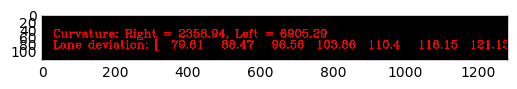

In [42]:


wpb_zero = np.zeros_like(lane_line_gb).astype(np.uint8)
color_warp = np.dstack((wpb_zero, wpb_zero, wpb_zero))
    
# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, left_y]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, right_y])))])

pts = np.hstack((pts_left, pts_right))


val_center = (left_fitx+right_fitx)/2.0
    
dist_offset = val_center - img_size[1]/2
dist_offset = np.round(dist_offset/2.81362,2)
str_offset = 'Lane deviation: ' + str(dist_offset) + ' cm.'

    # Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))


left_fit_cr = fit_cr(left_lane)
right_fit_cr = fit_cr(right_lane)
Left_curve = get_curvature(left_fit_cr,img_size[0]/2)
Right_curve = get_curvature(right_fit_cr,img_size[0]/2)


    
str_curv = 'Curvature: Right = ' + str(np.round(Right_curve,2)) + ', Left = ' + str(np.round(Left_curve,2)) 


warped,M,Minv = warp(image)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image

result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
font = cv2.FONT_HERSHEY_COMPLEX
    
middlepanel = np.zeros((120, 1280, 3), dtype=np.uint8)
cv2.putText(middlepanel, str_curv, (30, 60), font, 1, (255,0,0), 2)
cv2.putText(middlepanel, str_offset, (30, 90), font, 1, (255,0,0), 2)
plt.imshow(middlepanel)
